# Task 4: Sales Prediction Using Lasso Regression
Build a predictive model to forecast sales and visualize the results. Use Lasso Regression for this task and visualize the results using a box plot and a bar graph.

Import necessary libraries

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [30]:
data = pd.read_csv('advertising.csv')
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


Define the features (X) and the target variable (y)

In [31]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

Split the data into training and testing sets

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Initialize and train the Lasso Regression model

In [33]:
lasso = Lasso(alpha=0.1)  
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

Make predictions on the test set

In [34]:
y_pred = lasso.predict(X_test)

Evaluate the model

In [35]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2.5397762434037605
R-squared: 0.909214484422582


Visualize the results using a Box Plot

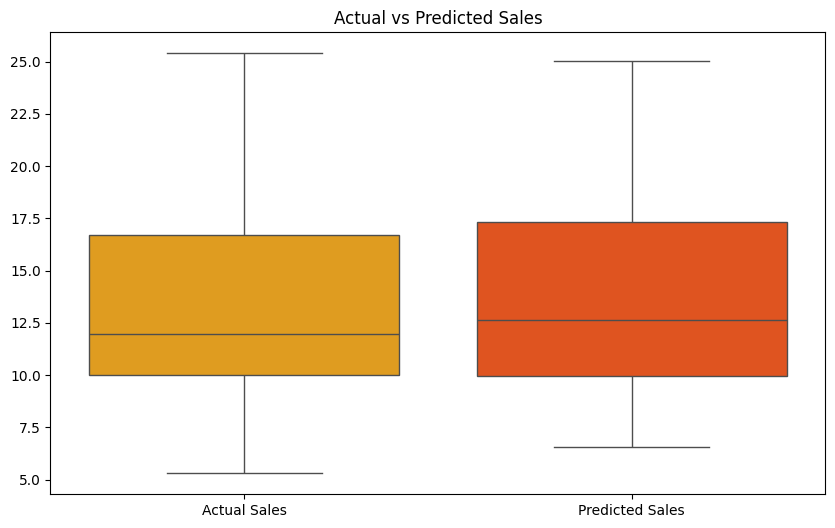

In [36]:
results_df = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': y_pred})
plt.figure(figsize=(10, 6))
sns.boxplot(data=results_df, palette=["#FFA500", "#FF4500"])
plt.title('Actual vs Predicted Sales')
plt.show()

<Figure size 1000x600 with 0 Axes>

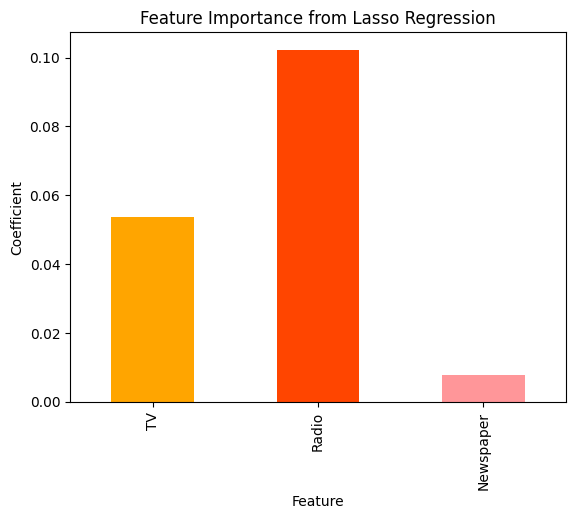

In [37]:
features = X.columns
coefficients = lasso.coef_
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
plt.figure(figsize=(10, 6))
coef_df.plot(kind='bar', x='Feature', y='Coefficient', legend=False, color=['#FFA500', '#FF4500', '#FF9699'])
plt.title('Feature Importance from Lasso Regression')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.show()